In [ ]:
# Code by Tejodbhav Koduru - AP19110010129

import pandas as pd
import numpy as np
from math import sqrt, pow, pi
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from os import mkdir
from mpl_toolkits import mplot3d

## Equations

In [ ]:
def get_constants():
  """
  Summary:
  This function stores and returns the Constant values for the progrgam

  Parameters:
  None

  Returns:
  speed_of_light (int) : Speed of Light, units = meters/second
  boltzmann_constant (float) : Boltzmann Constant, units = m**2 kg s**-2 K**-1
  planck_constant (float) : Planck's Constant, units = m**2 kg/s
  p_s_d (int) : Transmitted signal Power Spectral Density, units = Milliwatt
  ref_temp (float) : Reference Temperature, units = K
  euler_constant (float) : Euler's Constant, no units

  """
  speed_of_light = 299_790_000
  boltzmann_constant = 1.380649 * pow(10, -23)      # Kb = Boltzmann constant = 1.380649 × 10-23 m2 kg s-2 K-1
  planck_constant = 6.62607015 * pow(10, -34)     # h = Planck's Constsant = 6.62607015 × 10-34 m2 kg / s
  p_s_d = 1  # Stx(f) = transmitted signal p.s.d = 1, units = milliwatt
  ref_temp = 296.0   # T0 = Reference Temperature , units = k
  euler_constant = 2.71828

  return speed_of_light, boltzmann_constant, planck_constant, p_s_d, ref_temp, euler_constant

In [ ]:
# Demo Inputs
def get_demo_inputs():

  """
  Summary:
  This function stores and returns the inputs for testing of the progrgam

  Parameters:
  None

  Returns:
  frequency (int) : Frequency of the Signal, Units = Hz
  radius (float) : Distance between the transmitter and receiver, units = Millimeters
  real (float) : represents the real part of the relative permittivity of the material
  imaginary (float) : represents the imaginary part of the relative permittivity of the material

  """

  frequency = 100000000000
  radius = 2 * pow(10, -3)  # r = radius, units = millimeters,   initial values = [2, 4, 6, 8, 10]
  real = 8.236589  # my = 4.00130585  # epsilon_dash = permittivity
  imaginary = 10.768456256655087   # my = 0.015129157

  return frequency, radius, real, imaginary

${\lambda}_0 = \frac{C}{f}$

In [ ]:
def get_lambda_zero(speed_of_light, frequency):

  """
  Summary:
  This function calculates and returns the Lambda Zero

  parameters:
  speed_of_light (int) : The speed of light in meters/second unit
  frequency (float) : The frequency of the signal, Units = Hz

  Returns:
  lambda_zero (float) : Lambda Zero

  """

  lambda_zero = speed_of_light / frequency
  # print(f"{lambda_zero = }")

  return lambda_zero

${\Omega} = 2{\pi}f$ \\
${\varepsilon}'' = \frac{conductivity}{{\varepsilon}_0 * {\Omega}}$

In [ ]:
def get_imaginary_permittivity(frequency, conductivity):

  """
  Summary:
  This function calculates and returns the Imaginary part of the relative permittivity of the material

  parameters:
  frequency (float) : The frequency of the signal, Units = Hz
  conductivity (float) : The conductivity of the material, Units = S/m

  Returns:
  imaginary (float) : represents the imaginary part of the relative permittivity of the material

  References:
  [1] K. Yang, A. Alomainy and Y. Hao, "In-vivo characterisation and numerical
      analysis of the THz radio channel for nanoscale body-centric wireless networks,"
      2013 USNC-URSI Radio Science Meeting (Joint with AP-S Symposium), Lake Buena Vista,
      FL, USA, 2013, pp. 218-219, doi: 10.1109/USNC-URSI.2013.6715523.

  """

  epsilon_zero = 8.854 * pow(10, -12)

  omega = 2 * pi * frequency

  imaginary_permittivity = conductivity / (epsilon_zero * omega)

  return imaginary_permittivity

$K = \sqrt{\frac{\sqrt{\varepsilon'^2 +  \varepsilon''^2} - {\varepsilon}'}{2}}$

In [ ]:
def get_extinction_coefficient(real, imaginary):

  """
  Summary:
  This function calculates and returns the Extinction Coefficient

  parameters:
  real (float) : represents the real part of the relative permittivity of the material
  imaginary (float) : represents the imaginary part of the relative permittivity of the material

  Returns:
  extinction_coefficient (float) : Extinction Coefficient of the material

  References:
  [1] K. Yang, A. Alomainy and Y. Hao, "In-vivo characterisation and numerical
      analysis of the THz radio channel for nanoscale body-centric wireless networks,"
      2013 USNC-URSI Radio Science Meeting (Joint with AP-S Symposium), Lake Buena Vista,
      FL, USA, 2013, pp. 218-219, doi: 10.1109/USNC-URSI.2013.6715523.

  """\

  extinction_coefficient = sqrt(( sqrt(pow(real, 2) + pow(imaginary, 2)) - real) / 2)
  # print(f"{extinction_coefficient = }")

  return extinction_coefficient

$n = \sqrt{\frac{\sqrt{\varepsilon'^2 +  \varepsilon''^2} + \varepsilon'}{2}}$

In [ ]:
def get_refractive_index(real, imaginary):

  """
  Summary:
  This function calculates and returns the Refractive Index

  parameters:
  real (float) : represents the real part of the relative permittivity of the material
  imaginary (float) : represents the imaginary part of the relative permittivity of the material

  Returns:
  refractive_index (float) : Refractive Index of the material

  References:
  [1] K. Yang, A. Alomainy and Y. Hao, "In-vivo characterisation and numerical
      analysis of the THz radio channel for nanoscale body-centric wireless networks,"
      2013 USNC-URSI Radio Science Meeting (Joint with AP-S Symposium), Lake Buena Vista,
      FL, USA, 2013, pp. 218-219, doi: 10.1109/USNC-URSI.2013.6715523.

  """

  refractive_index = sqrt(( sqrt(pow(real, 2) + pow(imaginary, 2)) + real) / 2)
  # print(f"{refractive_index = }")

  return refractive_index

${\alpha} = \frac{4{\pi}K}{\lambda_0}$

In [ ]:
def get_absorption_coefficient(lambda_zero, extinction_coefficient):

  """
  Summary:
  This function calculates and returns the Absorption Coefficient

  parameters:
  lambda_zero (float) : Lambda Zero
  extinction_coefficient (float) : Extinction Coefficient of the material

  Returns:
  absorption_coefficient (float) : Absorption Coefficient of the material

  References:
  [1] K. Yang, A. Alomainy and Y. Hao, "In-vivo characterisation and numerical
      analysis of the THz radio channel for nanoscale body-centric wireless networks,"
      2013 USNC-URSI Radio Science Meeting (Joint with AP-S Symposium), Lake Buena Vista,
      FL, USA, 2013, pp. 218-219, doi: 10.1109/USNC-URSI.2013.6715523.

  """

  absorption_coefficient = (4 * pi * extinction_coefficient) / lambda_zero
  # print(f"{absorption_coefficient = }")

  return absorption_coefficient

$T_{(mol)}(r, f) = T_0 (1-e^{-{\alpha}(f)r})$

In [ ]:
def calc_noise_temperature(distance, absorption_coefficient, ref_temp, E):

  """
  Summary:
  The function calculates and returns the Molecular Noise Temperature

  Paremeters:
  distance (float) : Distance between transmitter and receiver, units = Meters
  absorption_coefficient (float) : Absorption Coefficient of the material
  ref_temp (float) : Reference Temperature, units = K
  E (float) : Euler's Constant, no units

  Returns:
  noise_temperature (float) : The molecular noise temperature

  References:
  [1] R. Zhang, K. Yang, A. Alomainy, Q. H. Abbasi, K. Qaraqe and R. M. Shubair,
      "Modelling of the terahertz communication channel for in-vivo nano-networks in the presence of noise,"
      2016 16th Mediterranean Microwave Symposium (MMS), Abu Dhabi, United Arab Emirates, 2016, pp. 1-4,
      doi: 10.1109/MMS.2016.7803812.
  """
  #Eq(6)
  noise_temperature = ref_temp * (1 - pow(E, (-absorption_coefficient * distance)))

  return noise_temperature


$B(T_0, f) = \frac{2h{\pi}(nf)^3}{c^2}(e^{\frac{hf}{k_BT_0}}-1)^{-1}$  
$N_b(f) = B(T_0, f)\frac{c^2}{4{\pi}(n_0f_0)^2}$

In [ ]:
def calc_body_radiation_noise(frequency, refractive_index, speed_of_light, ref_temp, planck_constant, boltzmann_constant, E):
  """
  Summary:
  The function calculates and returns the Body Radiation Noise

  Paremeters:
  frequency (int) : Frequency of the Signal, Units = Hz
  refractive_index (float) : Refractive Index of the material
  speed_of_light (int) : Speed of Light, units = meters/second
  ref_temp (float) : Reference Temperature, units = K
  planck_constant (float) : Planck's Constant, units = m**2 kg/s
  boltzmann_constant (float) : Boltzmann Constant, units = m**2 kg s**-2 K**-1
  E (float) : Euler's Constant, no units

  Returns:
  body_radiation_noise (float) : Body Radiation Noise

  References:
  [1] R. Zhang, K. Yang, A. Alomainy, Q. H. Abbasi, K. Qaraqe and R. M. Shubair,
      "Modelling of the terahertz communication channel for in-vivo nano-networks in the presence of noise,"
      2016 16th Mediterranean Microwave Symposium (MMS), Abu Dhabi, United Arab Emirates, 2016, pp. 1-4,
      doi: 10.1109/MMS.2016.7803812.
  """

  # Eq(7)
  a = ( 2 * planck_constant * pi * pow((refractive_index * frequency), 3) ) / pow(speed_of_light, 2)
  exponent = (planck_constant * frequency) / (boltzmann_constant * ref_temp)
  b = pow(E, exponent) - 1
  B_t0_f = a * pow(b, -1)


  # Eq(10)
  c = pow(speed_of_light, 2) / (4 * pi * pow((refractive_index * frequency), 2))
  body_radiation_noise = B_t0_f * c
  # print(f"{body_radiation_noise = }")

  return body_radiation_noise

$N_m(r, f) = S_{Tx}(f)(\frac{c}{4{\pi}nfr})^2(1-e^{-{\alpha}(f)r})$

In [ ]:
def calc_molecular_absorption_noise(frequency, distance, absorption_coefficient, refractive_index, p_s_d, speed_of_light, E):
  """
  Summary:
  The function calculates and returns the Molecular Absorption noise

  Paremeters:
  frequency (int) : Frequency of the Signal, Units = Hz
  distance (float) : Distance between transmitter and receiver, units = Meters
  absorption_coefficient (float) : Absorption Coefficient of the material
  refractive_index (float) : Refractive Index of the material
  p_s_d (int) : Transmitted signal Power Spectral Density, units = Milliwatt
  speed_of_light (int) : Speed of Light, units = meters/secon
  E (float) : Euler's Constant, no units

  Returns:
  molecular_absorption_noise (float) : Molecular Absorption Noise

  References:
  [1] R. Zhang, K. Yang, A. Alomainy, Q. H. Abbasi, K. Qaraqe and R. M. Shubair,
      "Modelling of the terahertz communication channel for in-vivo nano-networks in the presence of noise,"
      2016 16th Mediterranean Microwave Symposium (MMS), Abu Dhabi, United Arab Emirates, 2016, pp. 1-4,
      doi: 10.1109/MMS.2016.7803812.
  """

  #Eq(11)
  a = speed_of_light / (4 * pi * refractive_index * frequency * distance)
  exponent = absorption_coefficient * distance
  b = 1 - pow(E, -exponent)
  molecular_absorption_noise = p_s_d * pow(a, 2) * b
  # print(f"{molecular_absorption_noise = }")

  return molecular_absorption_noise


$N(r, f) = N_b(f) + N_m(r, f)$

In [ ]:
def calc_total_channel_noise(body_radiation_noise, molecular_absorption_noise):
  """
  Summary:
  The function calculates and returns the Total Channel Noise

  Paremeters:
  body_radiation_noise (float) : Body Radiation Noise
  molecular_absorption_noise (float) : Molecular Absorption Noise

  Returns:
  total_channel_noise (float) : Total Channel Noise

  References:
  [1] R. Zhang, K. Yang, A. Alomainy, Q. H. Abbasi, K. Qaraqe and R. M. Shubair,
      "Modelling of the terahertz communication channel for in-vivo nano-networks in the presence of noise,"
      2016 16th Mediterranean Microwave Symposium (MMS), Abu Dhabi, United Arab Emirates, 2016, pp. 1-4,
      doi: 10.1109/MMS.2016.7803812.
  """

  #Eq(12)
  total_channel_noise = body_radiation_noise + molecular_absorption_noise
  # print(f"{total_channel_noise = }")

  return total_channel_noise

## Driver Code

In [ ]:
def calc_all_noise_equations(frequencies, d, real_permittivities, conductivities):
  """
  Summary:
  The function calculates all the necessary equations and returns their respective results.

  Parameters:
  frequencies (iterable : float) : An array of Frequencies of the Signal, Units = Hz
  d (float) : Distance between transmitter and receiver, units = Meters
  real_permittivities (iterable : float) : An array of values representing the real part of the relative permittivity of the material
  conductivities (iterable : float) : An array of values of the conductivity of the material, Units = S/m

  Returns:
  imaginary_permittivities (iterable : float) : An array of values representing the imaginary part of the relative permittivity of the material
  extinction_coefficients (iterable : float) : An array of values representing the Extinction Coefficient of the material
  refractive_indexes (iterable : float) : An array of values representing the Refractive Index of the material
  noise_temperatures (iterable : float) : An array of values representing the Molecular Noise Temperature
  body_radiation_noises (iterable : float) : An array of values representing the Body Radiation Noise
  molecular_absorption_noises (iterable : float) : An array of values representing the Molecular Absorption Noise
  total_channel_noises (iterable : float) : An array of values representing the Total Channel Noise

  """

  # Constants
  C, Kb, H, Stx_f, T_zero, E = get_constants()

  imaginary_permittivities = []
  extinction_coefficients = []
  refractive_indexes = []
  noise_temperatures = []
  body_radiation_noises = []
  molecular_absorption_noises = []
  total_channel_noises = []

  for i in range(len(frequencies)):

    frequency = frequencies[i]
    epsilon_dash = real_permittivities[i]
    conductivity = conductivities[i]

    epsilon_double_dash = get_imaginary_permittivity(frequency, conductivity)

    K = get_extinction_coefficient(epsilon_dash, epsilon_double_dash)
    n = get_refractive_index(epsilon_dash, epsilon_double_dash)

    lambda_zero = get_lambda_zero(C, frequency)

    alpha_f = get_absorption_coefficient(lambda_zero, K)

    t_mol_r_f = calc_noise_temperature(d, alpha_f, T_zero, E)  # Eq(6)

    Nb_f = calc_body_radiation_noise(frequency, n, C, T_zero, H, Kb, E)  #Eq(10)

    Nm_r_f = calc_molecular_absorption_noise(frequency, d, alpha_f, n, Stx_f, C, E) #Eq(11)

    N_r_f = calc_total_channel_noise(Nb_f, Nm_r_f)    #Eq(12)

    imaginary_permittivities.append(epsilon_double_dash)
    extinction_coefficients.append(K)
    refractive_indexes.append(n)
    noise_temperatures.append(t_mol_r_f)
    body_radiation_noises.append(Nb_f)
    molecular_absorption_noises.append(Nm_r_f)
    total_channel_noises.append(N_r_f)

  return imaginary_permittivities, extinction_coefficients, refractive_indexes, noise_temperatures, body_radiation_noises, molecular_absorption_noises, total_channel_noises

In [ ]:
root_dir = "drive/MyDrive/College/Sem 8/Capstone Project/Code"  # Modify the root directory
input_dir = "inputs/Terahertz Band/50 samples"
output_dir = "outputs/Terahertz Band/50 samples/data"

file_names = ['Heart Muscle', 'Blood', 'Fat', 'Connective Tissue']
distances = [2, 4, 6, 8, 10]        # units = Millimeters

for file_name in file_names:

  for distance in distances:
    d = distance * pow(10, -3)    # Converting Millimeters to Meters

    df = pd.read_csv(f"{root_dir}/{input_dir}/{file_name}.csv") # reading the data file

    # Converting columns in a Dataframe to Lists
    frequencies = list(df["Frequency Hz"])
    real_permittivities = list(df["Permittivity"])
    conductivities = list(df["Elec. Cond. (S/m)"])

    # Executing the main function
    imaginary_permittivities, extinction_coefficients, refractive_indexes, noise_temperatures, body_radiation_noises, molecular_absorption_noises, total_channel_noises = calc_all_noise_equations(frequencies, d, real_permittivities, conductivities)

    # Converting Lists to columns in a Dataframe
    df["Imaginary Permittivity (e'')"] = imaginary_permittivities
    df["Extinction Coefficient (K)"] = extinction_coefficients
    df["Refractive Index (n)"] = refractive_indexes
    df["Noise Temperature eq(6)"] = noise_temperatures
    df["Body Radiation Noise eq(10)"] = body_radiation_noises
    df["Molecular Absorption Noise eq(11)"] = molecular_absorption_noises
    df["Total Channel Noise eq(12)"] = total_channel_noises

    # Saving the data file in csv format
    try:
      mkdir(f"{root_dir}/{output_dir}/{file_name}")   # Create a directory
    except FileExistsError:
      pass
    finally:
      df.to_csv(f"{root_dir}/{output_dir}/{file_name}/{distance} {file_name}.csv")

    # print(f"{file_name} \n dist:  {distance}")
    display(df.head())


## Plotting

In [ ]:
# inputs
root_dir = "drive/MyDrive/College/Sem 8/Capstone Project/Code"
output_dir = "outputs/Terahertz Band/50 samples"
dir_type = "data"
file_name = "Connective Tissue"
distances = [2, 4, 6, 8, 10]        # units = Millimeters

In [ ]:
dfs = []
frequencies_dists, noise_temperatures_dists, body_radiation_noises_dists, molecular_absorption_noises_dists, total_channel_noises_dists = [], [], [], [], []
distances_list = []

for distance in distances:

  temp_df = pd.read_csv(f"{root_dir}/{output_dir}/{dir_type}/{file_name}/{distance} {file_name}.csv")
  dfs.append(temp_df)

  # Converting columns in a Dataframe to Lists
  frequencies = list(temp_df["Frequency Hz"])
  frequencies_dists.append(frequencies)

  noise_temperatures = list(temp_df["Noise Temperature eq(6)"])
  noise_temperatures_dists.append(noise_temperatures)

  body_radiation_noises = list(temp_df["Body Radiation Noise eq(10)"])
  body_radiation_noises_dists.append(body_radiation_noises)

  molecular_absorption_noises = list(temp_df["Molecular Absorption Noise eq(11)"])
  molecular_absorption_noises_dists.append(molecular_absorption_noises)

  total_channel_noises = list(temp_df["Total Channel Noise eq(12)"])
  total_channel_noises_dists.append(total_channel_noises)

  temp_distance_list = [distance] * len(noise_temperatures)
  distances_list.append(temp_distance_list)



In [ ]:
def plot3D(metric, metric_list):

  dir_type = "plots"

  # defining surface and axes
  x = np.array(distances_list)
  y = np.array(frequencies_dists)
  z = np.array(metric_list)


  fig = plt.figure()

  # 3-D plotting
  ax = plt.axes(projection ='3d')

  # plotting
  ax.plot_surface(x, y, z, cmap ='viridis', edgecolor ='black')

  #setting titles
  ax.set_title(f'{file_name}')
  ax.set_xlabel('Distance (mm)')
  ax.set_ylabel('Frequency (THz)')
  ax.set_zlabel(f'{metric} (W/Hz)')
  plt.savefig(f"{root_dir}/{output_dir}/{dir_type}/{metric}/{file_name} {metric} {dir_type}.pdf")

  plt.show()



Total Channel Noise Connective Tissue 



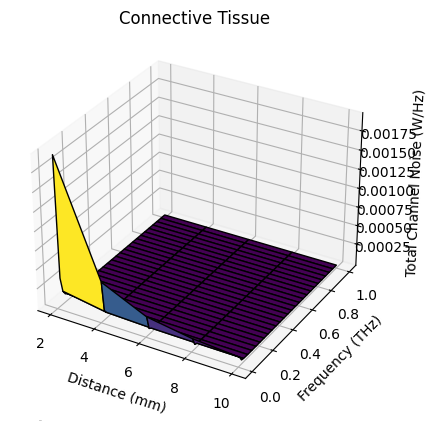



Body Radiation Noise Connective Tissue 



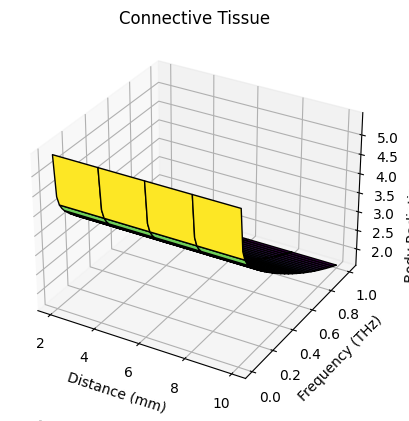



Molecular Absorption Noise Connective Tissue 



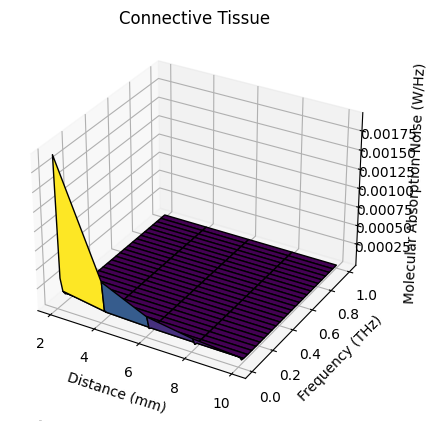



Noise Temperature Connective Tissue 



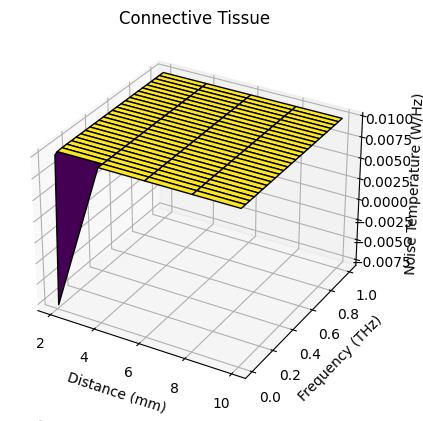

In [ ]:
metrics = ["Total Channel Noise", "Body Radiation Noise", "Molecular Absorption Noise", "Noise Temperature"]
metric_lists = [total_channel_noises_dists, body_radiation_noises_dists, molecular_absorption_noises_dists, noise_temperatures_dists]

for metric, metric_list in zip(metrics, metric_lists):
    print(f"{metric} {file_name} \n")
    plot3D(metric, metric_list)
    print("\n")





In [ ]:
print(distances_list)

[[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], [6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6], [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8], [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]]


In [ ]:
print(noise_temperatures_dists)

[[295.9996589794758, 295.9999999538541, 295.99999999880134, 295.99999999985306, 295.9999999999646, 295.9999999999877, 295.9999999999947, 295.9999999999974, 295.9999999999986, 295.99999999999915, 295.99999999999943, 295.99999999999966, 295.9999999999998, 295.99999999999983, 295.9999999999999, 295.9999999999999, 295.99999999999994, 295.99999999999994, 295.99999999999994, 295.99999999999994, 295.99999999999994, 295.99999999999994, 295.99999999999994, 296.0, 296.0, 296.0, 296.0, 296.0, 296.0, 296.0, 296.0, 296.0, 296.0, 296.0, 296.0, 296.0, 296.0, 296.0, 296.0, 296.0, 296.0, 296.0, 296.0, 296.0, 296.0, 296.0, 296.0, 296.0, 296.0, 296.0, 296.0], [295.9999999996072, 296.0, 296.0, 296.0, 296.0, 296.0, 296.0, 296.0, 296.0, 296.0, 296.0, 296.0, 296.0, 296.0, 296.0, 296.0, 296.0, 296.0, 296.0, 296.0, 296.0, 296.0, 296.0, 296.0, 296.0, 296.0, 296.0, 296.0, 296.0, 296.0, 296.0, 296.0, 296.0, 296.0, 296.0, 296.0, 296.0, 296.0, 296.0, 296.0, 296.0, 296.0, 296.0, 296.0, 296.0, 296.0, 296.0, 296.0, 29

In [ ]:
print(total_channel_noises_dists)

[[0.001305716357419, 0.0002704361334585, 0.0001151554654372, 6.321600159443898e-05, 3.978645862414661e-05, 2.729039915723641e-05, 1.9860613049069957e-05, 1.5091798033708548e-05, 1.1851809275400618e-05, 9.551618334340363e-06, 7.86047873669397e-06, 6.581160394549424e-06, 5.5901827987827736e-06, 4.807062409483186e-06, 4.177534485399077e-06, 3.663940185291482e-06, 3.239485461551663e-06, 2.8846877486204166e-06, 2.585107422004884e-06, 2.329859539111097e-06, 2.110613664514337e-06, 1.9209071304666e-06, 1.7556643419552483e-06, 1.6108544075144463e-06, 1.4832434214332966e-06, 1.3702126423907157e-06, 1.2696232726011147e-06, 1.179714675666384e-06, 1.0990269097484678e-06, 1.0263411575946929e-06, 9.60633479240246e-07, 9.010385909282746e-07, 8.468212601407534e-07, 7.973535397318047e-07, 7.520965193316543e-07, 7.105855969781314e-07, 6.724185161441306e-07, 6.372455914419856e-07, 6.047616748800549e-07, 5.746995195645201e-07, 5.468242683648769e-07, 5.209288555872565e-07, 4.968301528972584e-07, 4.743657233

In [ ]:
def plot2D(metric, metrics_list):
  fig = plt.subplots(figsize =(12, 8))

  # Plotting Data
  plt.plot(frequencies_dists[0], metrics_list[0], marker='s', color='r', label="Distance = 2")
  plt.plot(frequencies_dists[1], metrics_list[1], marker='s', color='b', label="Distance = 4")
  plt.plot(frequencies_dists[2], metrics_list[2], marker='s', color='g', label="Distance = 6")
  plt.plot(frequencies_dists[3], metrics_list[3], marker='s', color='y', label="Distance = 8")
  plt.plot(frequencies_dists[4], metrics_list[4], marker='s', color='violet', label="Distance = 10")

  # Adding Xticks and labels
  plt.xlabel('Frequency (THz)', fontsize = 20)
  plt.xticks(fontsize=20)

  # Adding Yticks and labels
  plt.ylabel(f'{metric} (W/Hz)' , fontsize = 20)
  plt.yticks(fontsize=20)
  plt.title(file_name, fontsize=20)

  plt.legend(fontsize=20)
  print(f"{root_dir}/{output_dir}/{dir_type}/{metric}/{file_name} {metric} {dir_type} Line Plot.pdf")
  plt.savefig(f"{root_dir}/{output_dir}/{dir_type}/{metric}/{file_name} {metric} {dir_type} Line Plot.pdf")
  plt.show()

Total Channel Noise Connective Tissue 

drive/MyDrive/College/Sem 8/Capstone Project/Code/outputs/Terahertz Band/50 samples/plots 2D/Total Channel Noise/Connective Tissue Total Channel Noise plots 2D Line Plot.pdf


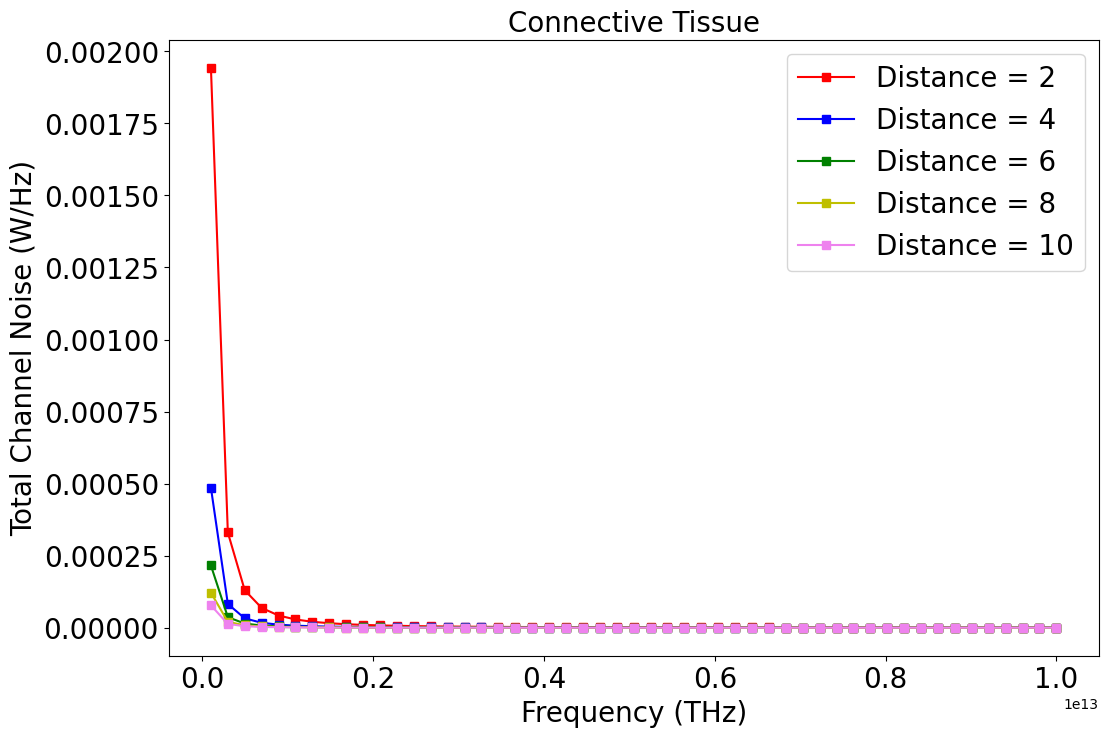



Body Radiation Noise Connective Tissue 

drive/MyDrive/College/Sem 8/Capstone Project/Code/outputs/Terahertz Band/50 samples/plots 2D/Body Radiation Noise/Connective Tissue Body Radiation Noise plots 2D Line Plot.pdf


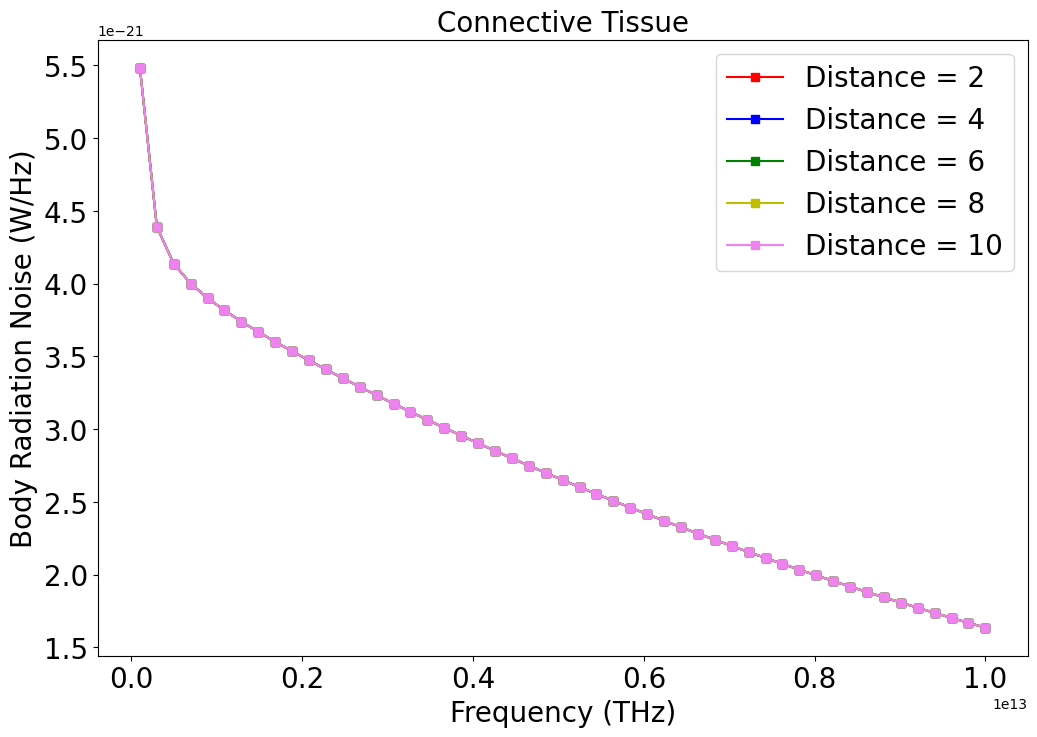



Molecular Absorption Noise Connective Tissue 

drive/MyDrive/College/Sem 8/Capstone Project/Code/outputs/Terahertz Band/50 samples/plots 2D/Molecular Absorption Noise/Connective Tissue Molecular Absorption Noise plots 2D Line Plot.pdf


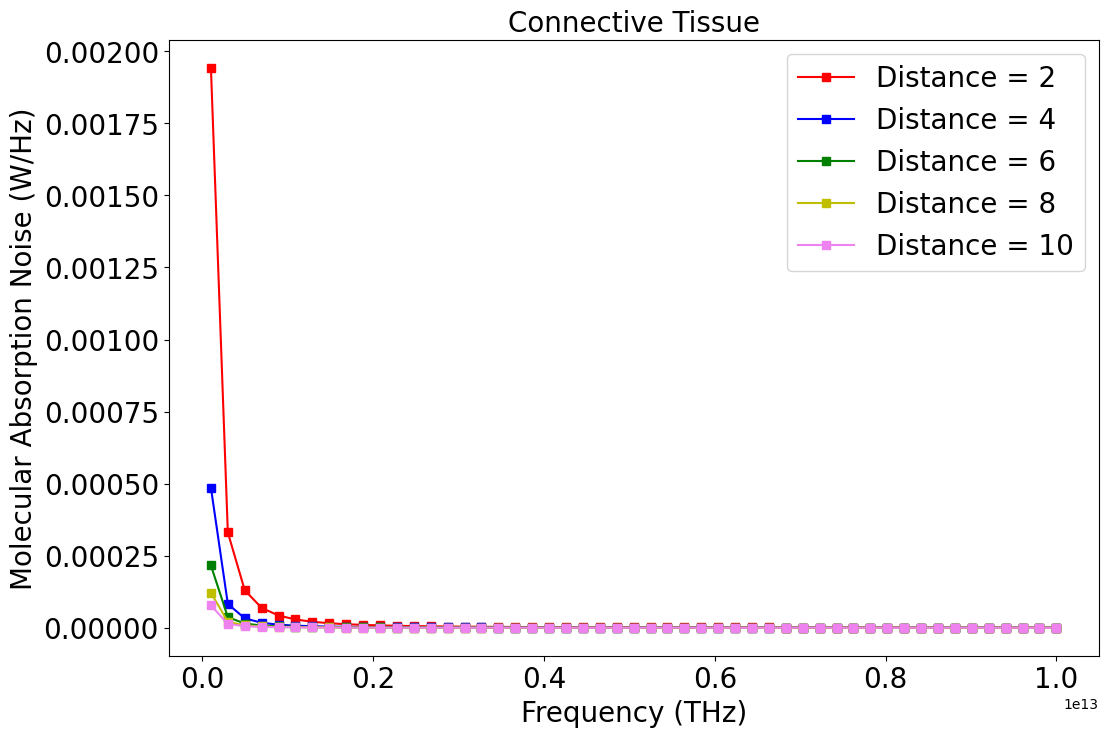



Noise Temperature Connective Tissue 

drive/MyDrive/College/Sem 8/Capstone Project/Code/outputs/Terahertz Band/50 samples/plots 2D/Noise Temperature/Connective Tissue Noise Temperature plots 2D Line Plot.pdf


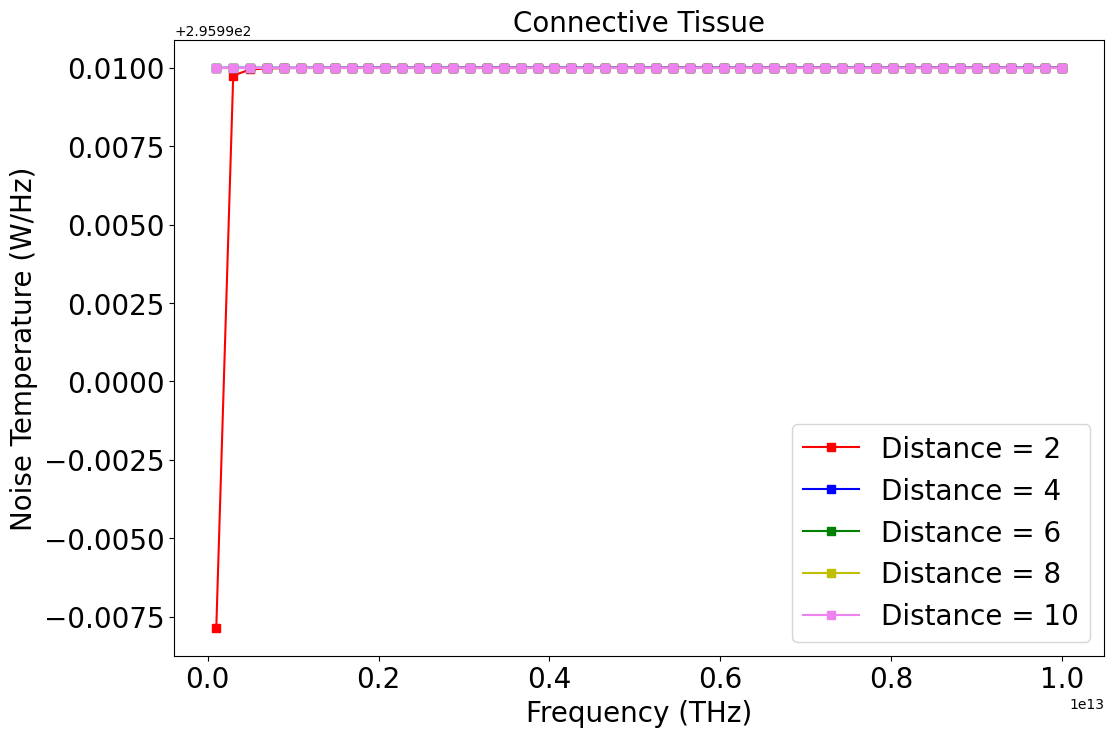

In [ ]:
metrics = ["Total Channel Noise", "Body Radiation Noise", "Molecular Absorption Noise", "Noise Temperature"]
metric_lists = [total_channel_noises_dists, body_radiation_noises_dists, molecular_absorption_noises_dists, noise_temperatures_dists]

dir_type = "plots 2D"

for metric, metric_list in zip(metrics, metric_lists):
    print(f"{metric} {file_name} \n")
    plot2D(metric, metric_list)
    print("\n")


In [ ]:
# inputs
root_dir = "drive/MyDrive/College/Sem 8/Capstone Project/Code"
output_dir = "outputs/Terahertz Band/50 samples"
dir_type = "data"
distances = [2, 4, 6, 8, 10]        # units = Millimeters
file_names = ['Heart Muscle', 'Blood', 'Fat', 'Connective Tissue']

file_freq, file_noise_temp, file_body_rad, file_ml_abs, file_tot_nos = [], [], [], [], []

for file_name in file_names:
  dfs = []
  frequencies_avgs, noise_temperatures_avgs, body_radiation_noises_avgs, molecular_absorption_noises_avgs, total_channel_noises_avgs = [], [], [], [], []

  for distance in distances:

    temp_df = pd.read_csv(f"{root_dir}/{output_dir}/{dir_type}/{file_name}/{distance} {file_name}.csv")
    dfs.append(temp_df)

    # Converting columns in a Dataframe to Lists
    frequencies = list(temp_df["Frequency Hz"])
    frequencies_avg = sum(frequencies)/len(frequencies)
    frequencies_avgs.append(frequencies_avg)

    noise_temperatures = list(temp_df["Noise Temperature eq(6)"])
    noise_temperatures_avg = sum(noise_temperatures)/len(noise_temperatures)
    noise_temperatures_avgs.append(noise_temperatures_avg)

    body_radiation_noises = list(temp_df["Body Radiation Noise eq(10)"])
    body_radiation_noises_avg = sum(body_radiation_noises)/len(body_radiation_noises)
    body_radiation_noises_avgs.append(body_radiation_noises_avg)

    molecular_absorption_noises = list(temp_df["Molecular Absorption Noise eq(11)"])
    molecular_absorption_noises_avg = sum(molecular_absorption_noises) / len(molecular_absorption_noises)
    molecular_absorption_noises_avgs.append(molecular_absorption_noises_avg)

    total_channel_noises = list(temp_df["Total Channel Noise eq(12)"])
    total_channel_noises_avg = sum(total_channel_noises) / len(total_channel_noises)
    total_channel_noises_avgs.append(total_channel_noises_avg)


  file_freq.append(frequencies_avgs)
  file_noise_temp.append(noise_temperatures_avgs)
  file_body_rad.append(body_radiation_noises_avgs)
  file_ml_abs.append(molecular_absorption_noises_avgs)
  file_tot_nos.append(total_channel_noises_avgs)


In [ ]:
print(file_tot_nos)
print(file_ml_abs)

[[3.8211784379551034e-05, 9.552953469171073e-06, 4.2457570974124176e-06, 2.3882383672949883e-06, 1.5284725550687926e-06], [3.7453774395017365e-05, 9.363447556923556e-06, 4.161532247522452e-06, 2.3408618892316767e-06, 1.498151609108274e-06], [9.328449917388395e-05, 2.3629141425556277e-05, 1.0504179606601172e-05, 5.908623769005341e-06, 3.7815194639098185e-06], [5.242638350600757e-05, 1.3107171902395828e-05, 5.825409749797582e-06, 3.276792984261998e-06, 2.0971475099280462e-06]]
[[3.8211784379551034e-05, 9.552953469171068e-06, 4.245757097412415e-06, 2.3882383672949833e-06, 1.5284725550687894e-06], [3.7453774395017365e-05, 9.363447556923554e-06, 4.16153224752245e-06, 2.3408618892316733e-06, 1.4981516091082716e-06], [9.328449917388395e-05, 2.3629141425556277e-05, 1.0504179606601172e-05, 5.908623769005337e-06, 3.7815194639098164e-06], [5.242638350600756e-05, 1.3107171902395828e-05, 5.825409749797579e-06, 3.276792984261996e-06, 2.0971475099280437e-06]]


In [ ]:
def plot2D2(metric, metrics_list):
  fig = plt.subplots(figsize =(12, 8))

  # Plotting Data
  plt.plot(distances, metrics_list[0], marker='s', color='b', label="Heart Muscle")
  plt.plot(distances, metrics_list[1], marker='s', color='r', label="Blood")
  plt.plot(distances, metrics_list[2], marker='s', color='g', label="Fat")
  plt.plot(distances, metrics_list[3], marker='s', color='y', label="Connective Tissue")


  # Adding Xticks and labels
  plt.xlabel('Distance (mm))', fontsize = 20)
  plt.xticks([2, 4, 6, 8, 10], fontsize=20)

  # Adding Yticks and labels
  plt.ylabel(f'{metric} (W/Hz)' , fontsize = 20)
  plt.yticks(fontsize=20)

  plt.legend(fontsize=20)
  print(f"{root_dir}/{output_dir}/{dir_type}/Dist {metric} {dir_type} Line Plot.pdf")
  plt.savefig(f"{root_dir}/{output_dir}/{dir_type}/Dist {metric} {dir_type} Line Plot.pdf")
  plt.show()

Total Channel Noise 

drive/MyDrive/College/Sem 8/Capstone Project/Code/outputs/Terahertz Band/50 samples/plots 2D2/Dist Total Channel Noise plots 2D2 Line Plot.pdf


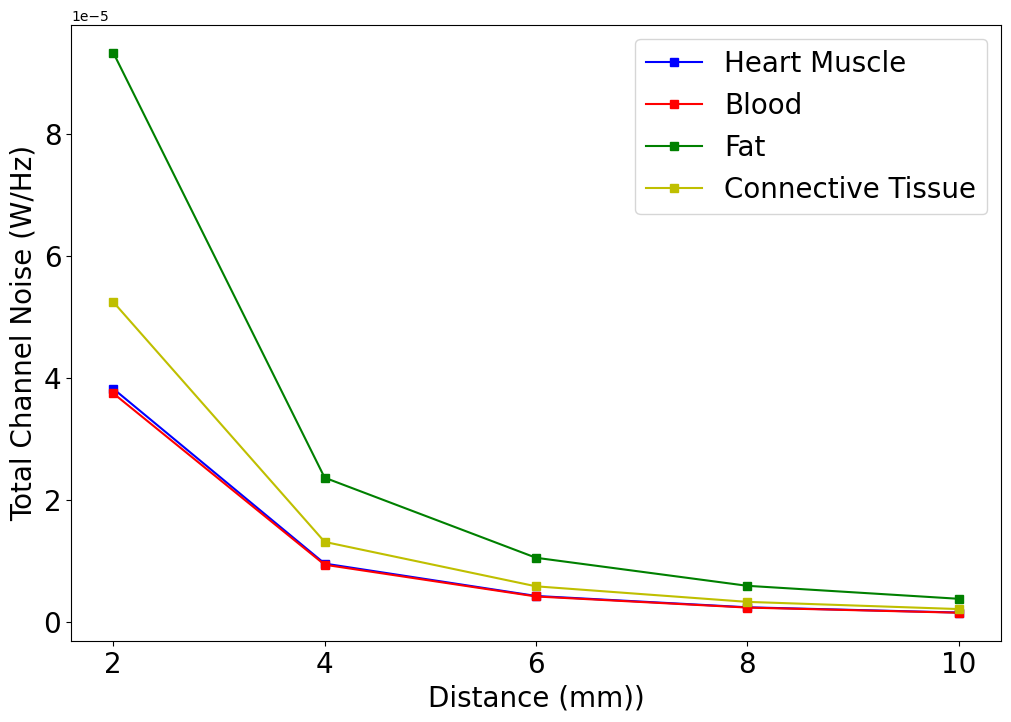



Body Radiation Noise 

drive/MyDrive/College/Sem 8/Capstone Project/Code/outputs/Terahertz Band/50 samples/plots 2D2/Dist Body Radiation Noise plots 2D2 Line Plot.pdf


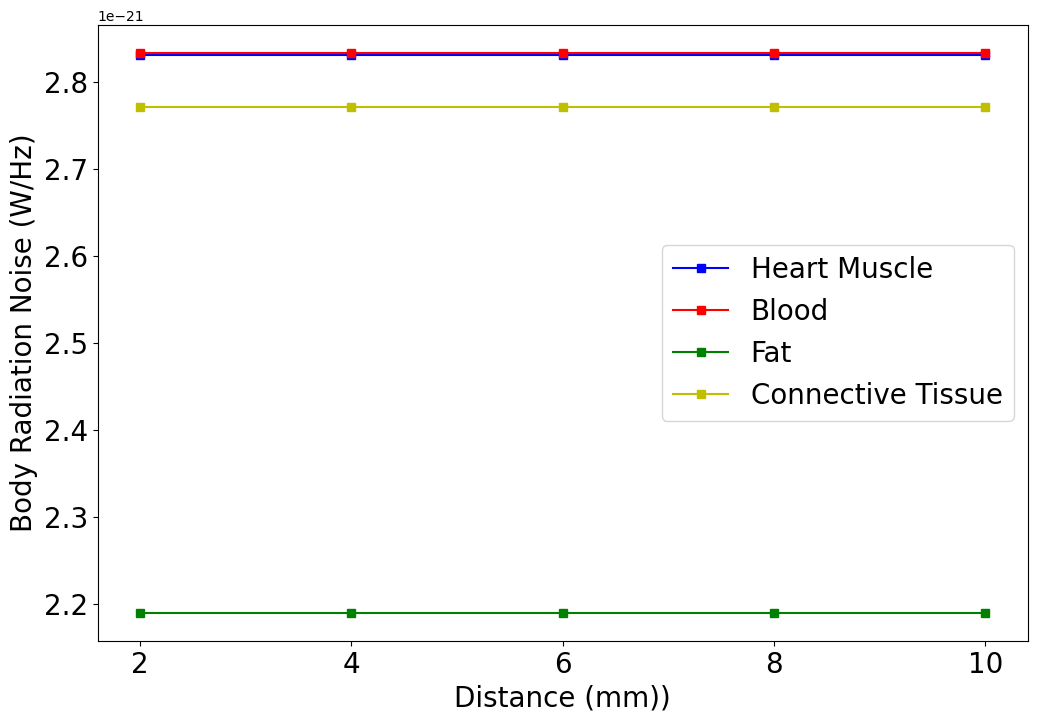



Molecular Absorption Noise 

drive/MyDrive/College/Sem 8/Capstone Project/Code/outputs/Terahertz Band/50 samples/plots 2D2/Dist Molecular Absorption Noise plots 2D2 Line Plot.pdf


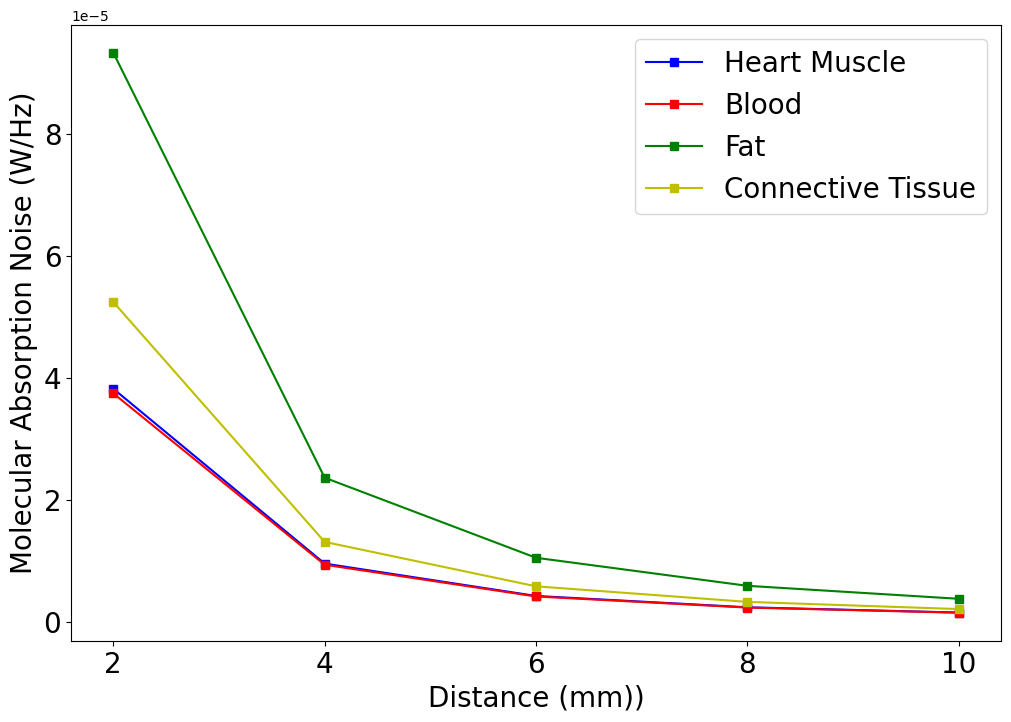



Noise Temperature 

drive/MyDrive/College/Sem 8/Capstone Project/Code/outputs/Terahertz Band/50 samples/plots 2D2/Dist Noise Temperature plots 2D2 Line Plot.pdf


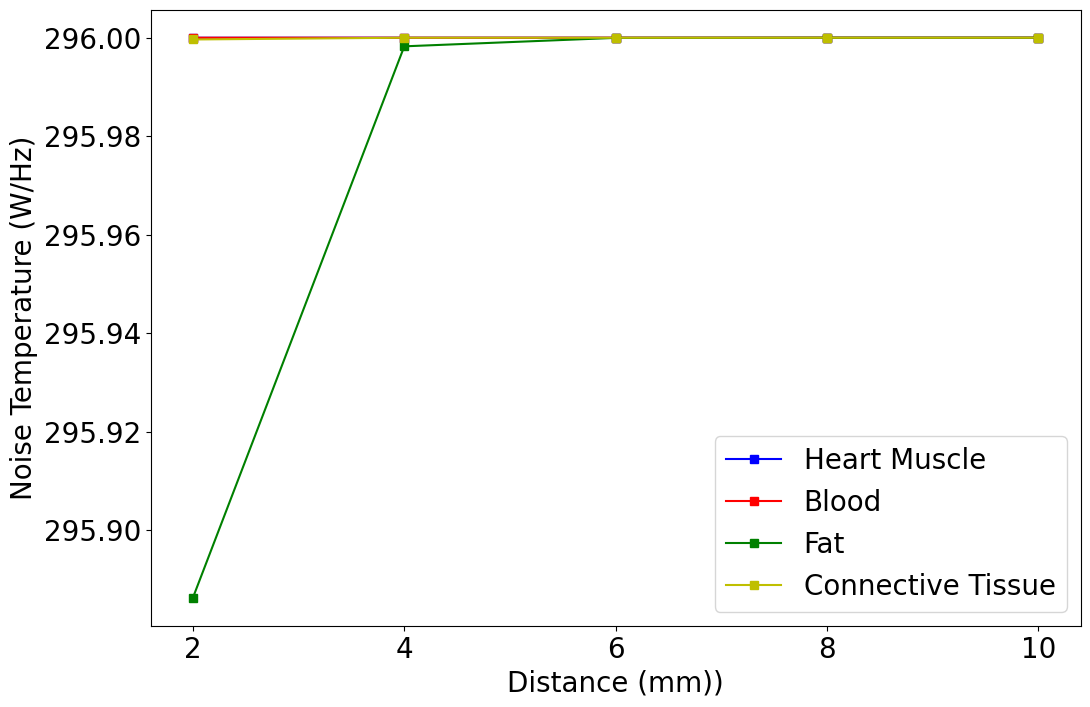

In [ ]:
metrics = ["Total Channel Noise", "Body Radiation Noise", "Molecular Absorption Noise", "Noise Temperature"]
metric_lists = [file_tot_nos, file_body_rad, file_ml_abs, file_noise_temp]

dir_type = "plots 2D2"

for metric, metric_list in zip(metrics, metric_lists):
    print(f"{metric} \n")
    plot2D2(metric, metric_list)
    print("\n")
